### In this notebook we are building Alzheimer's severity classifier using Fast AI & serving with Voila.

In [1]:
import fastbook
fastbook.setup_book() 

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
# Define file path that contains images data
path = Path('Alzheimer_s Dataset/train')
path

Path('Alzheimer_s Dataset/train')

Let's see how to get images from our path using **get_image_files** function.

In [4]:
files = get_image_files(path)
files

(#5121) [Path('Alzheimer_s Dataset/train/MildDemented/mildDem69.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem560.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem202.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem671.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem88.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem672.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem657.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem643.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem151.jpg'),Path('Alzheimer_s Dataset/train/MildDemented/mildDem528.jpg')...]

Check if there are any corrupt images using **verify_images** function.

In [5]:
failed = verify_images(files)
failed

(#0) []

All files are clean.

**Create DataLoaders**

We will use Data Block API to create data loaders.

In [6]:
alzheimers = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128))

Spliting our data into train (80%) set & validation (20%) set. parent_label is a fast ai function returns the name of the folder that contains images corresponding to a specific class.

In [7]:
# Create train & validation data loaders
dls = alzheimers.dataloaders(path)

dls contains the train & validation dataloader.

Let's see the images in validation dataloader using **show_batch** function.

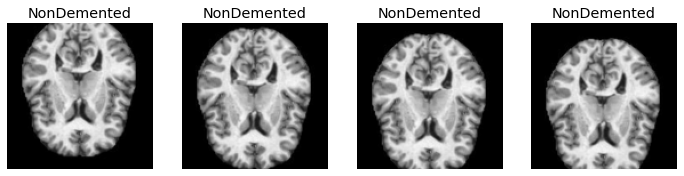

In [8]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Let's see the images in validation dataloader using **show_batch** function.

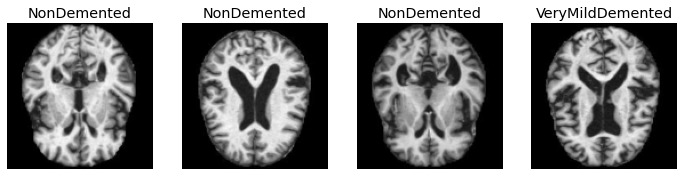

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

### Train our Alzheimers severity classifier

We are fine tuning our data with resnet18 using **cnn_learner** function.

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=2.2908675418875646e-06)

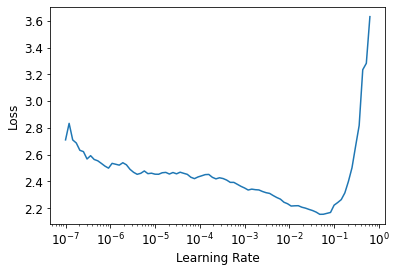

In [10]:
# Create a learner using cnn_learner function
learn = cnn_learner(dls, resnet18, metrics=error_rate)

#Find the best learning rate for fine tuning our model
learn.lr_find()

We can use the suggested learning rate & fine tune our model:

In [11]:
# Let's fine tune our learner using fine_tune() function
learn.fine_tune(15, 4.7e-3)           # number of epochs = 15

epoch,train_loss,valid_loss,error_rate,time
0,1.808606,1.076337,0.437500,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.959826,0.735733,0.307617,00:07
1,0.742427,0.588967,0.225586,00:08
2,0.571321,0.451529,0.182617,00:08
3,0.432701,0.481995,0.156250,00:08
4,0.309385,0.250595,0.101562,00:07
5,0.223910,0.365784,0.117188,00:07
6,0.156984,0.358830,0.109375,00:07
7,0.120353,0.157401,0.051758,00:07
8,0.082941,0.128833,0.044922,00:07
9,0.059182,0.128065,0.044922,00:07


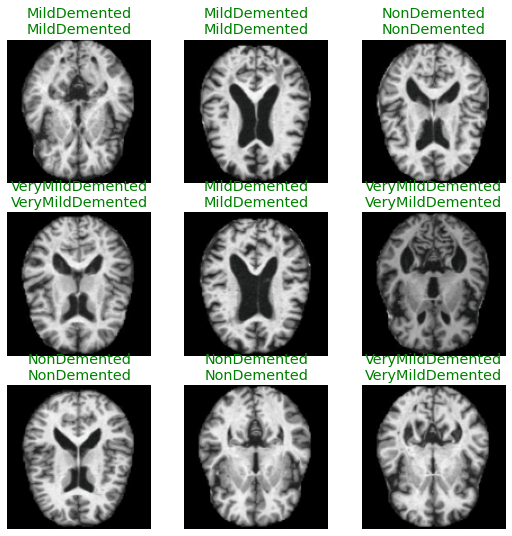

In [25]:
learn.show_results()

fastai can show us a graph of the training and validation loss:

### Confusion matrix

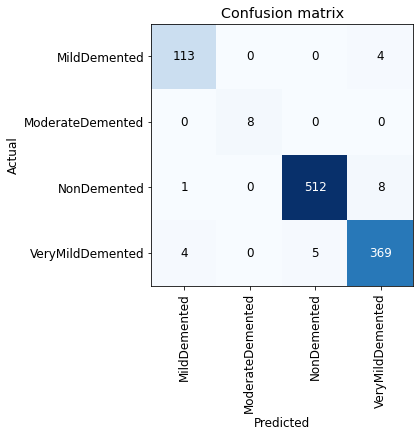

In [28]:
class_intern = ClassificationInterpretation.from_learner(learn)
class_intern.plot_confusion_matrix(figsize = (12,6))

It seems model is having some difficulty in distinguishing between VeryMildDemented & MildDemented class, between VeryMildDemented & NonDemented.

Now **plot_top_losses**, which shows us the images with highest loss in our dataset.

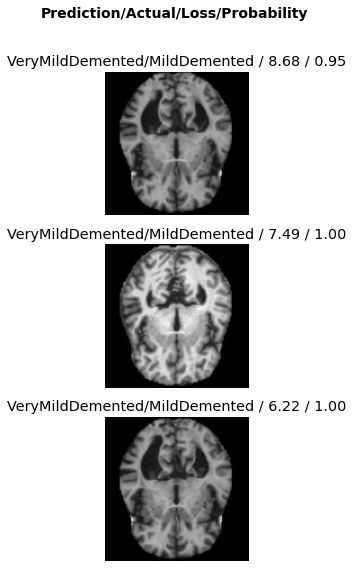

In [14]:
class_intern.plot_top_losses(3, nrows=3)

The output shows that the image with highest loss predicted as VeryMildDemented, but the actual class is MildDemented.

fastai includes a handy GUI for data cleaning called **ImageClassifierCleaner** that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [15]:
cleaner = ImageClassifierCleaner(learn)

In [16]:
cleaner

 To delete (unlink) all images selected for deletion.

In [17]:
for idx in cleaner.delete():cleaner.files[idx].unlink()

To move images for which we've selected a different category.

In [18]:
for idx,cat in cleaner.change():shutil.move(str(cleaner.files[idx]), path/cat)

**Using the Model for Inference**

We call export(), a fast ai function which saves model with architecture & the trained parameters in a file called "export.pkl"

In [19]:
learn.export()

Let's check if the export file exists in our path

In [20]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]